In [2]:
import scipy.io #to operate on the .mat files
import seaborn as sns
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [3]:
#Get the path for each fault data
for root, dirs, files in os.walk("0_Load_48_KHZ",topdown=False):
    for file_name in files:
        path = os.path.join(root,file_name)
        print(path)


0_Load_48_KHZ\14_BF.mat
0_Load_48_KHZ\14_IR.mat
0_Load_48_KHZ\14_OR1.mat
0_Load_48_KHZ\21_BF.mat
0_Load_48_KHZ\21_IR.mat
0_Load_48_KHZ\21_OR1.mat
0_Load_48_KHZ\21_OR2.mat
0_Load_48_KHZ\21_OR3.mat
0_Load_48_KHZ\7_BF.mat
0_Load_48_KHZ\7_IR.mat
0_Load_48_KHZ\7_OR1.mat
0_Load_48_KHZ\7_OR2.mat
0_Load_48_KHZ\7_OR3.mat
0_Load_48_KHZ\N.mat


In [4]:
#open the .mat file
path = r'0_Load_48_KHZ\14_BF.mat'
mat = scipy.io.loadmat(path) #dict
mat.items()

dict_items([('__header__', b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Mon Jan 31 15:29:56 2000'), ('__version__', '1.0'), ('__globals__', []), ('X189_DE_time', array([[ 0.03984554],
       [ 0.08970462],
       [ 0.13664308],
       ...,
       [ 0.00897046],
       [-0.01001354],
       [-0.01668923]])), ('X189_FE_time', array([[ 0.03924182],
       [ 0.08834545],
       [ 0.13457273],
       ...,
       [ 0.00883455],
       [-0.00986182],
       [-0.01643636]])), ('X189RPM', array([[1797]], dtype=uint16))])

In [5]:
list(mat.keys())

['__header__',
 '__version__',
 '__globals__',
 'X189_DE_time',
 'X189_FE_time',
 'X189RPM']

In [8]:
#Access the third element
key_name = list(mat.keys())[3]

In [9]:
#Get values from dict
DE_data = mat.get(key_name)

In [10]:
#labbelling the faults
fault = np.full((len(DE_data),1),file_name[:-4])

In [16]:
#Create the dataframe
df_temp = pd.DataFrame({'DE_data':np.ravel(DE_data) ,'fault':np.ravel(fault)})

In [17]:
df_temp

,DE_data,fault
0,0.039846,N
1,0.089705,N
2,0.136643,N
3,0.177532,N
4,0.205903,N
...,...,...
249141,0.045895,N
249142,0.028163,N
249143,0.008970,N
249144,-0.010014,N


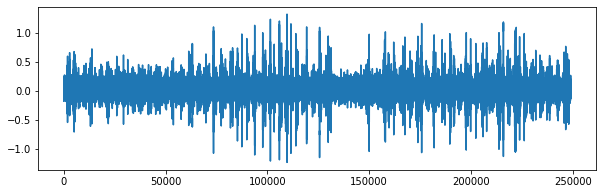

In [18]:
#plot the first column
plt.figure(figsize=(10,3))
plt.plot(df_temp.iloc[:,0])
plt.show()

In [24]:
#For the entire fault condition
#Get the path for each fault data
df = pd.DataFrame(columns =["DE_data","fault"]) #Dataframe

for root, dirs, files in os.walk("0_Load_48_KHZ",topdown=False):
    for file_name in files:
        path = os.path.join(root,file_name)
        print(path)
        
        mat = scipy.io.loadmat(path) #dict
        key_name = list(mat.keys())[3]
        DE_data = mat.get(key_name)
        fault = np.full((len(DE_data),1),file_name[:-4])
        
        df_temp = pd.DataFrame({'DE_data':np.ravel(DE_data) ,'fault':np.ravel(fault)})
        
        df = pd.concat([df,df_temp],axis=0)#add each fault to the df
        
        print(df['fault'].unique())
        
df.to_csv('all_faults.csv',index=False) #converts to csv and saves   

0_Load_48_KHZ\14_BF.mat
['14_BF']
0_Load_48_KHZ\14_IR.mat
['14_BF' '14_IR']
0_Load_48_KHZ\14_OR1.mat
['14_BF' '14_IR' '14_OR1']
0_Load_48_KHZ\21_BF.mat
['14_BF' '14_IR' '14_OR1' '21_BF']
0_Load_48_KHZ\21_IR.mat
['14_BF' '14_IR' '14_OR1' '21_BF' '21_IR']
0_Load_48_KHZ\21_OR1.mat
['14_BF' '14_IR' '14_OR1' '21_BF' '21_IR' '21_OR1']
0_Load_48_KHZ\21_OR2.mat
['14_BF' '14_IR' '14_OR1' '21_BF' '21_IR' '21_OR1' '21_OR2']
0_Load_48_KHZ\21_OR3.mat
['14_BF' '14_IR' '14_OR1' '21_BF' '21_IR' '21_OR1' '21_OR2' '21_OR3']
0_Load_48_KHZ\7_BF.mat
['14_BF' '14_IR' '14_OR1' '21_BF' '21_IR' '21_OR1' '21_OR2' '21_OR3'
 '7_BF']
0_Load_48_KHZ\7_IR.mat
['14_BF' '14_IR' '14_OR1' '21_BF' '21_IR' '21_OR1' '21_OR2' '21_OR3'
 '7_BF' '7_IR']
0_Load_48_KHZ\7_OR1.mat
['14_BF' '14_IR' '14_OR1' '21_BF' '21_IR' '21_OR1' '21_OR2' '21_OR3'
 '7_BF' '7_IR' '7_OR1']
0_Load_48_KHZ\7_OR2.mat
['14_BF' '14_IR' '14_OR1' '21_BF' '21_IR' '21_OR1' '21_OR2' '21_OR3'
 '7_BF' '7_IR' '7_OR1' '7_OR2']
0_Load_48_KHZ\7_OR3.mat
['14_BF' '14_

In [25]:
df=pd.read_csv('all_faults.csv')

In [26]:
df

,DE_data,fault
0,0.039846,14_BF
1,0.089705,14_BF
2,0.136643,14_BF
3,0.177532,14_BF
4,0.205903,14_BF
...,...,...
2782624,-0.059664,N
2782625,-0.063836,N
2782626,-0.034630,N
2782627,0.016689,N


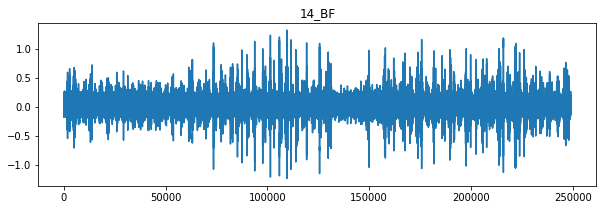

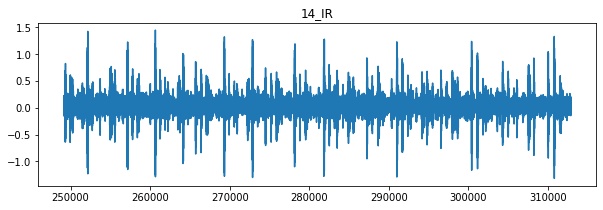

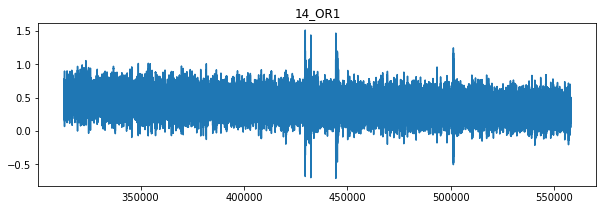

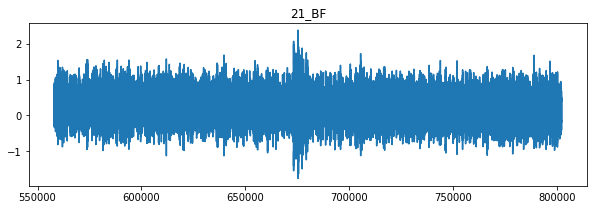

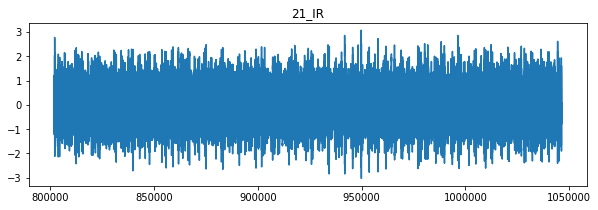

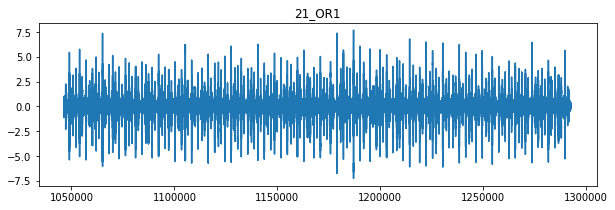

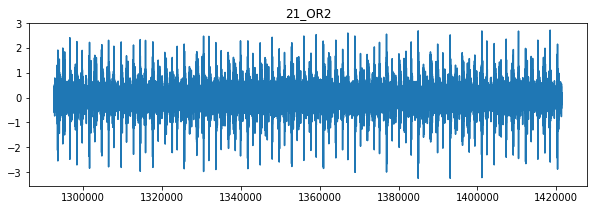

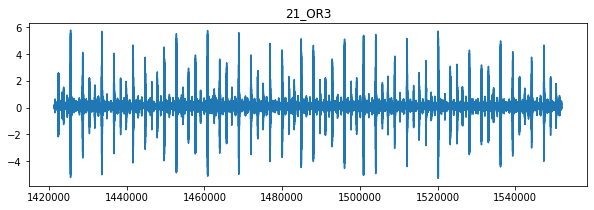

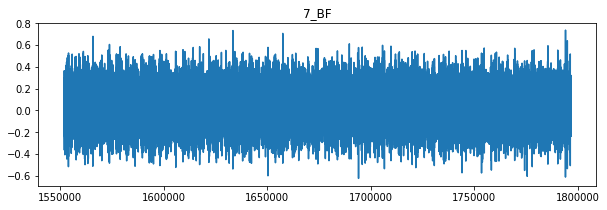

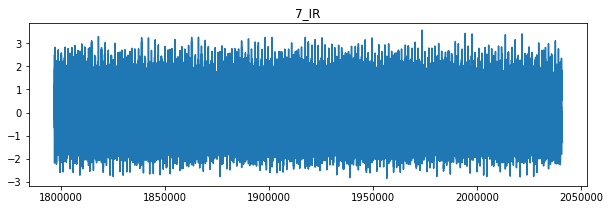

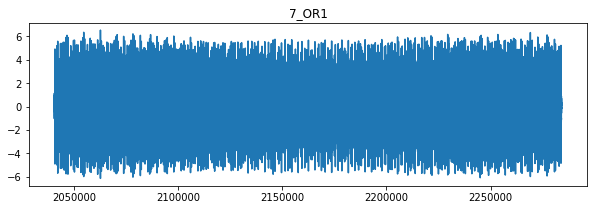

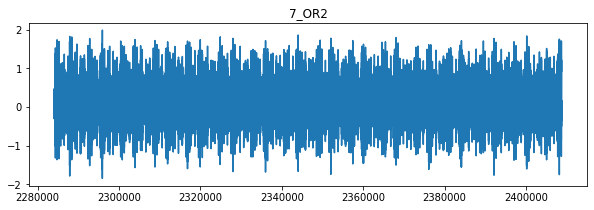

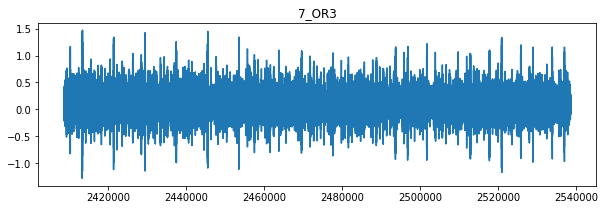

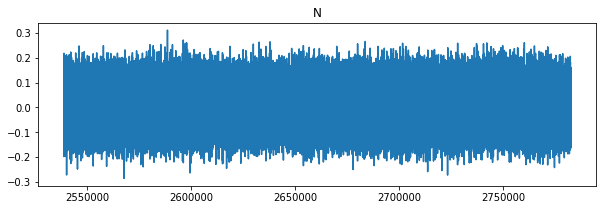

In [28]:
faults = df['fault'].unique()
for f in faults:
    plt.figure(figsize=(10,3))
    plt.plot(df[df['fault']==f].iloc[:,0])
    plt.title(f)
    plt.show()

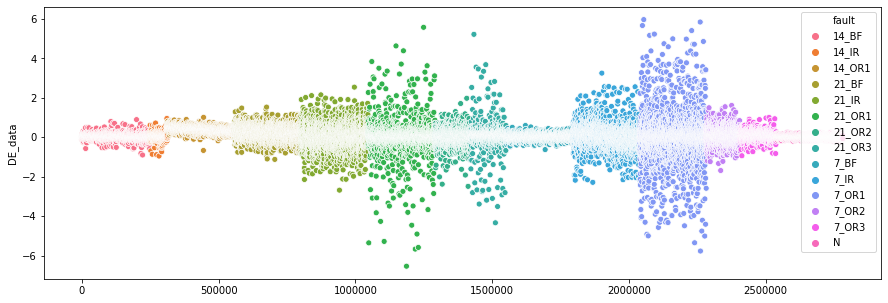

In [29]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=df.iloc[::100,:],y='DE_data',x=np.arange(0,len(df),100),hue='fault')
plt.show()